# Import Raspberry Pi Images

## Initialize

In [1]:
# Import Packages
import skimage
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import cv2

import os
import glob

# Matplotlib inline
%matplotlib inline

In [2]:
# Load Images
imset = np.array([cv2.imread(i, cv2.IMREAD_GRAYSCALE) for i in glob.glob("../newFom/IMG_0405.jpg")])

# print("Size of our dataset: {} images.\nEach image has dimensions: {}.\nEach channel is of type: {}".format( \
#     imset.shape[0], imset[0].shape, type(imset[0][0][0][0])))
type(imset[0])

numpy.ndarray

## Process Image
_Find interesting real-estate on the image_

### loop and look and slice and test to find the dots

_reference: https://stackoverflow.com/questions/8076889/how-to-use-opencv-simpleblobdetector _

#### Import Images

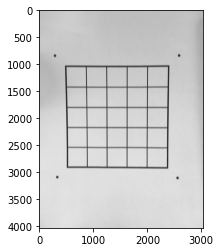

In [3]:
#TODO: GENERALIZE IMPORT OF IMAGES

# Select Image from imageset using opencv, show
img = imset[0]
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


#### Denoise

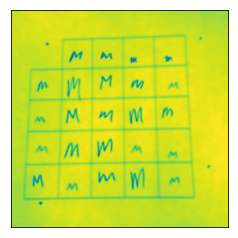

In [101]:
# DESTROY
img3 = cv2.fastNlMeansDenoising(img,None,10,21,7)
plt.imshow(img3, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.savefig('lil.jpg', bbox_inches='tight')
plt.show()

#### Initialize Detector

In [7]:
# Initialize Params
    # Ref: https://www.learnopencv.com/blob-detection-using-opencv-python-c/
params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 10
# Filter by Area.
params.filterByArea = True
# params.minArea = 1500
params.maxArea = 50

# check opencv version and construct the detector
    # Ref: https://stackoverflow.com/questions/48136978/how-to-use-feature2dsuch-as-simpleblobdetector-correctly-python-opencv/48137140
is_v2 = cv2.__version__.startswith("2.")
if is_v2:
    detector = cv2.SimpleBlobDetector(params)
else:
    detector = cv2.SimpleBlobDetector_create(params)

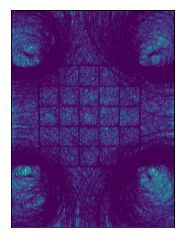

In [13]:
# DESTROY
# img2 = imset[0]
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20, param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)


plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.savefig('lel.jpg', bbox_inches='tight')
plt.show()

#### Detect Blobs

In [8]:
# Detect blobs
keypoints = detector.detect(img)

#### Display Results

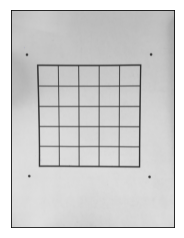

In [9]:
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# plt.imshow(im_with_keypoints, cmap = 'gray', interpolation = 'bicubic')
plt.imshow(im_with_keypoints, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.savefig('lol.jpg', bbox_inches='tight')
plt.show()

# Save Image

record the location of the dots

test your locations to make sure you got em.

    if (got dots) then I expect to see lines here and here
        DO I have a line? 
        Do I have a second line?
    if (got lines) then set flag true
        

     alternativly
 		If I (got dots) I can transform as necessary to put the dots in a proper place
 			get the letters cause we know they are each in a box.
 			#this required a new form with more location marks - dots 
 			#see the NewForm folder in the TDS_Image_Proj folder

if (got dots and flag) then
	calculate the transform to get the lines square.
	apply the transform
	loop 24 times 
		each itteration to get one of the images
		output the images to a special folder and drink a beer. part one of n-1 parts done!!!
		

## Export